# Data Exploration and Analysis
### Import the following modules for analysis:

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 

## Part 1: Look at NC vs. US causes of death in 2016

### (a) Create Dataframe for US Percents for each cause of death

In [85]:
#look at US causes of death in 2016
# pull US info from un-cleaned data file
file2 = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')
USOnly = file2.loc[file2["State"] == "United States", :]
# get rid of all causese
USOnly2 = USOnly.loc[USOnly["Cause Name"] != "All causes", :]
USOnly2.set_index("Year")
#grab only 2016
USOnly3 = USOnly2.loc[USOnly["Year"] == 2016, :]
USOnly3
# use initial data table to calculate percents for each death cause
totalDeaths2 = USOnly3["Deaths"].sum()
causeDeaths2 = USOnly3.groupby('Cause Name')['Deaths'].sum()
    
uPercent2 = (causeDeaths2.loc['Unintentional injuries'] / totalDeaths2) * 100
aPercent2 = (causeDeaths2.loc["Alzheimer's disease"] / totalDeaths2) * 100
cancerPercent2 = (causeDeaths2.loc['Cancer'] / totalDeaths2) * 100
CLRDPercent2 = (causeDeaths2.loc['CLRD'] / totalDeaths2) * 100
diabetesPercent2 = (causeDeaths2.loc['Diabetes'] / totalDeaths2) * 100
hPercent2 = (causeDeaths2.loc['Heart disease'] / totalDeaths2) * 100
iPercent2 = (causeDeaths2.loc['Influenza and pneumonia'] / totalDeaths2) * 100
kPercent2 = (causeDeaths2.loc['Kidney disease'] / totalDeaths2) * 100
strokePercent2 = (causeDeaths2.loc['Stroke'] / totalDeaths2) * 100
suicidePercent2 = (causeDeaths2.loc['Suicide'] / totalDeaths2) * 100

# create datafrane to hold the data we already have
causeDeathsDf3 = pd.DataFrame(causeDeaths2)
#define where new column should be located
idx = 1
# Define list for new coulmn - in alaphabetical order because referenced dataframe has cause name alphabetical
causePercents2 = [aPercent2, CLRDPercent2, cancerPercent2, diabetesPercent2, hPercent2, iPercent2, kPercent2, strokePercent2, suicidePercent2, uPercent2]
# insert new column into existing dataframe
causeDeathsDf3.insert(loc=idx, column='Cause Percents', value=causePercents2)
# sort cause percents in descending order (high to low)
causeDeathsDf4 = causeDeathsDf3.sort_values(["Cause Percents"], ascending=False)
# format percentages
causeDeathsDf4["Cause Percents"] = causeDeathsDf4["Cause Percents"].map("{:.2f}%".format)

#display dataframe
causeDeathsDf4

,Deaths,Cause Percents
Cause Name,,
Heart disease,635260,31.23%
Cancer,598038,29.40%
Unintentional injuries,161374,7.93%
CLRD,154596,7.60%
Stroke,142142,6.99%
Alzheimer's disease,116103,5.71%
Diabetes,80058,3.94%
Influenza and pneumonia,51537,2.53%
Kidney disease,50046,2.46%


###  (b) Create a pie chart for US Cause of Death Percentages in 2016

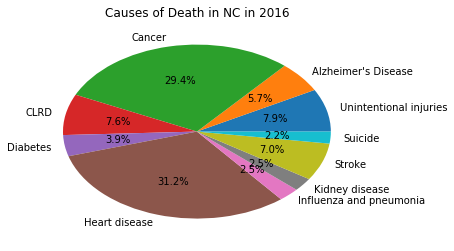

In [86]:
# Create and plot pie Chart - reference: https://pythonspot.com/tag/pie-chart/
labels = 'Unintentional injuries', "Alzheimer's Disease", 'Cancer', 'CLRD', 'Diabetes', 'Heart disease', 'Influenza and pneumonia', 'Kidney disease', 'Stroke', 'Suicide'
sizes2 = [uPercent2, aPercent2, cancerPercent2, CLRDPercent2, diabetesPercent2, hPercent2, iPercent2, kPercent2, strokePercent2, suicidePercent2]
plt.pie(sizes2, labels=labels, autopct='%1.1f%%')
plt.title('Causes of Death in NC in 2016')
# save figure
#plt.savefig('TotalFaresPie.png', bbox_inches='tight')
plt.show()

### (c) Create another Dataframe for NC Percents for each cause of death

In [87]:
#isolate data for NC causes in 2016
file3 = pd.read_csv('cleaned.csv')
NCOnly = file3.loc[file3["State"] == "North Carolina", :]
NCOnly.set_index("Year")
NCOnly2 = NCOnly.loc[NCOnly["Year"] == 2016, :]
NCOnly2
# use initial data table to calculate percents for each death cause
totalDeaths = NCOnly2["Deaths"].sum()
causeDeaths = NCOnly2.groupby('Cause Name')['Deaths'].sum()
 
uPercent = (causeDeaths.loc['Unintentional injuries'] / totalDeaths) * 100
aPercent = (causeDeaths.loc["Alzheimer's disease"] / totalDeaths) * 100
cancerPercent = (causeDeaths.loc['Cancer'] / totalDeaths) * 100
CLRDPercent = (causeDeaths.loc['CLRD'] / totalDeaths) * 100
diabetesPercent = (causeDeaths.loc['Diabetes'] / totalDeaths) * 100
hPercent = (causeDeaths.loc['Heart disease'] / totalDeaths) * 100
iPercent = (causeDeaths.loc['Influenza and pneumonia'] / totalDeaths) * 100
kPercent = (causeDeaths.loc['Kidney disease'] / totalDeaths) * 100
strokePercent = (causeDeaths.loc['Stroke'] / totalDeaths) * 100
suicidePercent = (causeDeaths.loc['Suicide'] / totalDeaths) * 100

# create datafrane to hold the data we already have
causeDeathsDf = pd.DataFrame(causeDeaths)
#define where new column should be located
idx = 1
# Define list for new coulmn
causePercents = [aPercent, CLRDPercent, cancerPercent, diabetesPercent, hPercent, iPercent, kPercent, strokePercent, suicidePercent, uPercent]
# insert new column into existing dataframe
causeDeathsDf.insert(loc=idx, column='Cause Percents', value=causePercents)
# sort cause percents in descending order (high to low)
causeDeathsDf2 = causeDeathsDf.sort_values(["Cause Percents"], ascending=False)
# format percentages
causeDeathsDf2["Cause Percents"] = causeDeathsDf2["Cause Percents"].map("{:.2f}%".format)
#display dataframe
causeDeathsDf2

,Deaths,Cause Percents
Cause Name,,
Cancer,19523,29.69%
Heart disease,18266,27.78%
Unintentional injuries,5476,8.33%
CLRD,5311,8.08%
Stroke,4940,7.51%
Alzheimer's disease,4153,6.32%
Diabetes,2811,4.28%
Kidney disease,2002,3.04%
Influenza and pneumonia,1896,2.88%


### (d) Create pie chart for NC Cause of Death Percentages in 2016

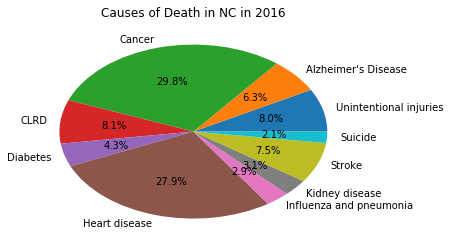

In [88]:
# Create and plot pie Chart - reference: https://pythonspot.com/tag/pie-chart/
sizes = [uPercent2, aPercent, cancerPercent, CLRDPercent, diabetesPercent, hPercent, iPercent, kPercent, strokePercent, suicidePercent]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Causes of Death in NC in 2016')
# save figure
#plt.savefig('TotalFaresPie.png', bbox_inches='tight')
plt.show()

### (e) Combine NC and US Pie Charts

In [89]:
#combinedDf = pd.DataFrame({'NC Cause of Death Percentages': sizes, 'US Cause of Death Percentages': sizes2}, index=['Unintentional injuries', "Alzheimer's Disease", 'Cancer', 'CLRD', 'Diabetes', 'Heart disease', 'Influenza and pneumonia', 'Kidney disease', 'Stroke', 'Suicide'])
# make the multiple plot
#combinedDf.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(18,9))
#plt.title("NC vs. US")

## Part 2: Look at NC and US Change in Death Rate over 17 years

### (a) Create connected line chart for all individual cause of deaths in US over 17 years

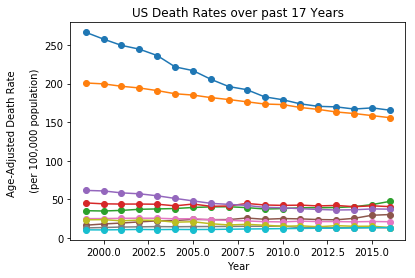

In [90]:
# read file for US only causes of death, isolate heart disease data
file7 = pd.read_csv('USOnly.csv')

USHeart = file7.loc[file7["Cause Name"] == "Heart disease"]
USCancer = file7.loc[file7["Cause Name"] == "Cancer", :]
USSuicide = file7.loc[file7["Cause Name"] == "Suicide", :]
USUn = file7.loc[file7["Cause Name"] == "Unintentional injuries", :]
USCLRD = file7.loc[file7["Cause Name"] == "CLRD", :]
USStroke = file7.loc[file7["Cause Name"] == "Stroke", :]
USA = file7.loc[file7["Cause Name"] == "Alzheimer's disease", :]
USDiabetes = file7.loc[file7["Cause Name"] == "Diabetes", :]
USKid = file7.loc[file7["Cause Name"] == "Kidney disease", :]
USIn = file7.loc[file7["Cause Name"] == "Influenza and pneumonia", :]

plt.plot(USHeart['Year'], USHeart['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Heart disease')
plt.plot(USCancer['Year'], USCancer['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Cancer')
plt.plot(USUn['Year'], USUn['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Unintentional injuries')
plt.plot(USCLRD['Year'], USCLRD['Age-adjusted Death Rate'], linestyle='-', marker='o', label='CLRD')
plt.plot(USStroke['Year'], USStroke['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Stroke')
plt.plot(USA['Year'], USA['Age-adjusted Death Rate'], linestyle='-', marker='o', label="Alzheimer's disease")
plt.plot(USDiabetes['Year'], USDiabetes['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Diabetes')
plt.plot(USKid['Year'], USKid['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Kidney disease')
plt.plot(USIn['Year'], USIn['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Influenza and pneumonia')
plt.plot(USSuicide['Year'], USSuicide['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Suicide')

plt.ylabel('Age-Adjusted Death Rate \n \n (per 100,000 population)')
plt.xlabel('Year')
plt.title('US Death Rates over past 17 Years')
#plt.legend(loc='best')
plt.show()

### (b) Create connected line chart for all individual cause of deaths in NC over 17 years

Text(0.5,1,'NC Death Rates over past 17 Years')

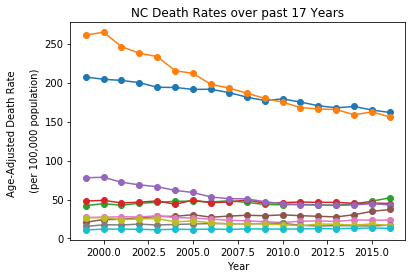

In [91]:
file3 = pd.read_csv('cleaned.csv')
NCOnly = file3.loc[file3["State"] == "North Carolina", :]

NCHeart3 = NCOnly.loc[NCOnly["Cause Name"] == "Heart disease", :]
NCCancer3 = NCOnly.loc[NCOnly["Cause Name"] == "Cancer", :]
NCSuicide3 = NCOnly.loc[NCOnly["Cause Name"] == "Suicide", :]
NCUn = NCOnly.loc[NCOnly["Cause Name"] == "Unintentional injuries", :]
NCCLRD = NCOnly.loc[NCOnly["Cause Name"] == "CLRD", :]
NCStroke = NCOnly.loc[NCOnly["Cause Name"] == "Stroke", :]
NCA = NCOnly.loc[NCOnly["Cause Name"] == "Alzheimer's disease", :]
NCDiabetes = NCOnly.loc[NCOnly["Cause Name"] == "Diabetes", :]
NCKid = NCOnly.loc[NCOnly["Cause Name"] == "Kidney disease", :]
NCIn = NCOnly.loc[NCOnly["Cause Name"] == "Influenza and pneumonia", :]

plt.plot(NCCancer3['Year'], NCCancer3['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Cancer')
plt.plot(NCHeart3['Year'], NCHeart3['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Heart Disease')
plt.plot(NCUn['Year'], NCUn['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Unintentional')
plt.plot(NCCLRD['Year'], NCCLRD['Age-adjusted Death Rate'], linestyle='-', marker='o', label='CLRD')
plt.plot(NCStroke['Year'], NCStroke['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Stroke')
plt.plot(NCA['Year'], NCA['Age-adjusted Death Rate'], linestyle='-', marker='o', label="Alzeheimer's")
plt.plot(NCDiabetes['Year'], NCDiabetes['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Diabetes')
plt.plot(NCKid['Year'], NCKid['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Kidney')
plt.plot(NCIn['Year'], NCIn['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Influenza and pneumonia')
plt.plot(NCSuicide3['Year'], NCSuicide3['Age-adjusted Death Rate'], linestyle='-', marker='o', label='Suicide')

plt.ylabel('Age-Adjusted Death Rate \n \n (per 100,000 population)')
plt.xlabel('Year')
plt.title('NC Death Rates over past 17 Years')
#plt.legend(loc='best')
#plt.show()

### (c) Show US and NC graphs together ... 

### (d) Look at Total Death Rates in NC vs. US over 17 years

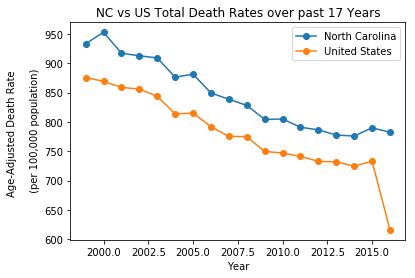

In [92]:
# read file for states all causes of death data
file4 = pd.read_csv('allCausesOnly.csv')
# isolate only NC
isolateNC = file4.loc[file4["State"] == "North Carolina", :]

# read file for only US all causes of death data 
file5 = pd.read_csv('allCausesUSOnly.csv')
 
# want to look at change over time - create plot-esque chart with connected scatter plot
# graph one line for NC and one for US, then add labels, title, and legend
plt.plot(isolateNC['Year'], isolateNC['Age-adjusted Death Rate'], linestyle='-', marker='o', label='North Carolina')
plt.plot(file5['Year'], file5['Age-adjusted Death Rate'], linestyle='-', marker='o', label = 'United States')
plt.ylabel('Age-Adjusted Death Rate \n \n (per 100,000 population)')
plt.xlabel('Year')
plt.title('NC vs US Total Death Rates over past 17 Years')
plt.legend(loc='best')
plt.show()

 ### (e) Chart #1 Leading Cause of Death (Heart Disease)'s death rates in NC and US over 17 years

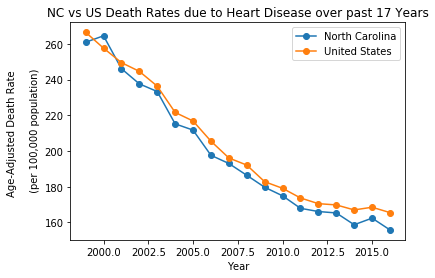

In [93]:
# read file for cleaned states causes of death, isolate NC data, isolate heart disease data
file3 = pd.read_csv('cleaned.csv')
NCHeartDisease = file3.loc[file3["State"] == "North Carolina", :]
NCHeartDisease2 = NCHeartDisease.loc[NCHeartDisease["Cause Name"] == "Heart disease", :]

# read file for US only causes of death, isolate heart disease data
file7 = pd.read_csv('USOnly.csv')
USHeartDisease = file7.loc[file7["Cause Name"] == "Heart disease", :]

# want to look at change over time - create line plot-esque chart with connected scatter plot
# graph one line for NC and one for US, then add labels, title, and legend
plt.plot(NCHeartDisease2['Year'], NCHeartDisease2['Age-adjusted Death Rate'], linestyle='-', marker='o', label='North Carolina')
plt.plot(USHeartDisease['Year'], USHeartDisease['Age-adjusted Death Rate'], linestyle='-', marker='o', label='United States')
plt.ylabel('Age-Adjusted Death Rate \n \n (per 100,000 population)')
plt.xlabel('Year')
plt.title('NC vs US Death Rates due to Heart Disease over past 17 Years')
plt.legend(loc='best')
plt.show()

 ### (f) Chart Second Leading cause of Death (Cancer)'s death rates in NC vs US over 17 Years

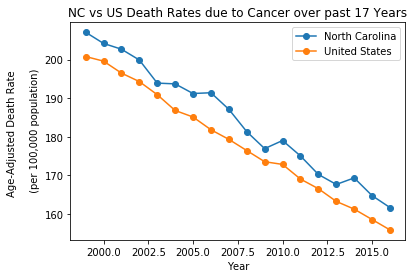

In [94]:
# read file for cleaned states causes of death, isolate NC data, isolate heart disease data
file3 = pd.read_csv('cleaned.csv')
NCCancer = file3.loc[file3["State"] == "North Carolina", :]
NCCancer2 = NCCancer.loc[NCHeartDisease["Cause Name"] == "Cancer", :]

# read file for US only causes of death, isolate heart disease data
file7 = pd.read_csv('USOnly.csv')
USCancer = file7.loc[file7["Cause Name"] == "Cancer", :]

# want to look at change over time - create line plot-esque chart with connected scatter plot
# graph one line for NC and one for US, then add labels, title, and legend
plt.plot(NCCancer2['Year'], NCCancer2['Age-adjusted Death Rate'], linestyle='-', marker='o', label='North Carolina')
plt.plot(USCancer['Year'], USCancer['Age-adjusted Death Rate'], linestyle='-', marker='o', label='United States')
plt.ylabel('Age-Adjusted Death Rate \n \n (per 100,000 population)')
plt.xlabel('Year')
plt.title('NC vs US Death Rates due to Cancer over past 17 Years')
plt.legend(loc='best')
plt.show()

### (g) Chart Third Leading cause of Death (Unintentional Inuries)'s death rates in NC vs US over 17 Years

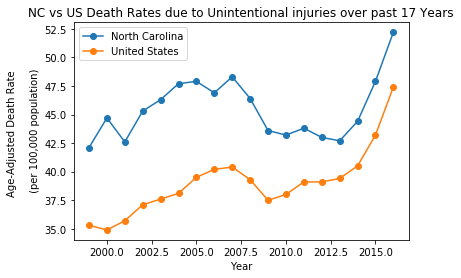

In [95]:
# read file for cleaned states causes of death, isolate NC data, isolate suicide data
file3 = pd.read_csv('cleaned.csv')
NCUn = file3.loc[file3["State"] == "North Carolina", :]
NCUn2 = NCUn.loc[NCUn["Cause Name"] == "Unintentional injuries", :]

# read file for US only causes of death, isolate suicide data
file7 = pd.read_csv('USOnly.csv')
USUn = file7.loc[file7["Cause Name"] == "Unintentional injuries", :]

# want to look at change over time - create line plot-esque chart with connected scatter plot
# graph one line for NC and one for US, then add labels, title, and legend
plt.plot(NCUn2['Year'], NCUn2['Age-adjusted Death Rate'], linestyle='-', marker='o', label='North Carolina')
plt.plot(USUn['Year'], USUn['Age-adjusted Death Rate'], linestyle='-', marker='o', label='United States')
plt.ylabel('Age-Adjusted Death Rate \n \n (per 100,000 population)')
plt.xlabel('Year')
plt.title('NC vs US Death Rates due to Unintentional injuries over past 17 Years')
plt.legend(loc='best')
plt.show()

### (h) Chart Suicide's Death Rates in NC and US over 17 Years

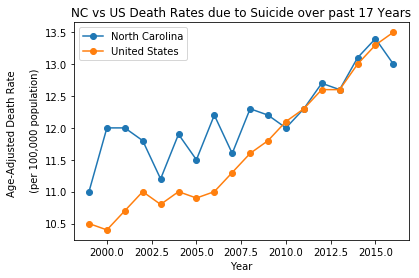

In [96]:
# read file for cleaned states causes of death, isolate NC data, isolate suicide data
file3 = pd.read_csv('cleaned.csv')
NCSuicide = file3.loc[file3["State"] == "North Carolina", :]
NCSuicide2 = NCSuicide.loc[NCSuicide["Cause Name"] == "Suicide", :]

# read file for US only causes of death, isolate suicide data
file7 = pd.read_csv('USOnly.csv')
USSuicide = file7.loc[file7["Cause Name"] == "Suicide", :]

# want to look at change over time - create line plot-esque chart with connected scatter plot
# graph one line for NC and one for US, then add labels, title, and legend
plt.plot(NCSuicide2['Year'], NCSuicide2['Age-adjusted Death Rate'], linestyle='-', marker='o', label='North Carolina')
plt.plot(USSuicide['Year'], USSuicide['Age-adjusted Death Rate'], linestyle='-', marker='o', label='United States')
plt.ylabel('Age-Adjusted Death Rate \n \n (per 100,000 population)')
plt.xlabel('Year')
plt.title('NC vs US Death Rates due to Suicide over past 17 Years')
plt.legend(loc='best')
plt.show()

## Part 3: Look at Regional Death Rates over 17 years

 ### (a) Create dataframe for 2016 Death Rates (All Causes) by Region

In [97]:
# read file for states all causes of death data
file4 = pd.read_csv('allCausesOnly.csv')
only2016 = file4.loc[file4["Year"] == 2016, :]   

# Group states by region (US Census Bureau divides US into 4 regions):
Northeast = only2016.loc[only2016["State"].isin(["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "New Jersey", "Pennsylvania"])]                            
Midwest = only2016.loc[only2016["State"].isin(["Ohio", "Michigan", "Indiana", "Wisconsin", "Illinois", "Minnesota", "Iowa", "Missouri", "North Dakota", "South Dakota", "Nebraska", "Kansas"])]
South = only2016.loc[only2016["State"].isin(["Delaware", "Maryland", "Virginia", "West Virginia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Georgia", "Florida", "Alabama", "Mississippi", "Arkansas", "Louisiana", "Texas", "Oklahoma", "District of Columbia"])]
West = only2016.loc[only2016["State"].isin(["Montana", "Idaho", "Wyoming", "Colorado", "New Mexico", "Arizona", "Utah", "Nevada", "California", "Oregon", "Washington", "Alaska", "Hawaii"])]

# calculate average death rate for each region
NEMean = Northeast["Age-adjusted Death Rate"].mean()
MWMean = Midwest["Age-adjusted Death Rate"].mean()
SMean = South["Age-adjusted Death Rate"].mean()
WMean = West["Age-adjusted Death Rate"].mean()
NatMean = only2016["Age-adjusted Death Rate"].mean()

# create dataframe for regions, sort averages in descending order, format averages
RegionDf = pd.DataFrame({"Region": ["Northeast", "Midwest", "South", "West"], "All Causes Average": [NEMean, MWMean, SMean, WMean]})
RegionDf2 = RegionDf.sort_values(["All Causes Average"], ascending=False)
RegionDf2["All Causes Average"] = RegionDf2["All Causes Average"].map("{:.0f}".format)
RegionDf2

RegionPlusUSDf = pd.DataFrame({"Region": ["US","Northeast", "Midwest", "South", "West"], "Average AADR": [NatMean,NEMean, MWMean, SMean, WMean]}).round(2)
RegionPlusUSDf

,Region,Average AADR
0,US,751.99
1,Northeast,698.41
2,Midwest,745.33
3,South,826.15
4,West,698.27


### (b) Create bar chart for 2016 Death Rates (All Causes) by Region

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


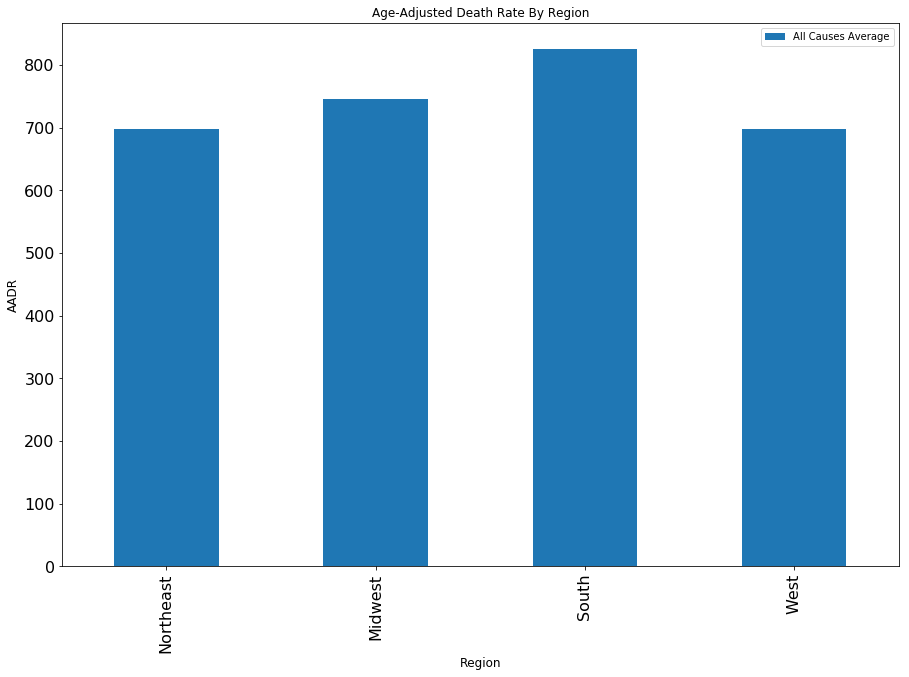

In [98]:
Midwest.loc[:,'Region']='MidWest'
#Midwest
South.loc[:,'Region']='SouthernUS'
#South.head()
Northeast.loc[:,'Region']='NorthEast'
#Northeast.head()
West.loc[:,'Region']='WesternUS'
#West.head()
only2016.loc[:,'Region'] ='USA'
#only2016.head()

RegionPlusUSDf = pd.DataFrame({"Region": ["US","Northeast", "Midwest", "South", "West"], "Average AADR": [NatMean,NEMean, MWMean, SMean, WMean]}).round(2)
RegionPlusUSDf
#for bar chart    
x_axis = np.arange(len(RegionDf['Region']))
ax = RegionDf.plot(kind='bar', title ='Age-Adjusted Death Rate By Region', figsize =(15,10), legend = True, fontsize =16)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('AADR',fontsize=12)
regions=[value for value in x_axis]
plt.xticks(regions,['Northeast','Midwest','South','West'])
plt.show()

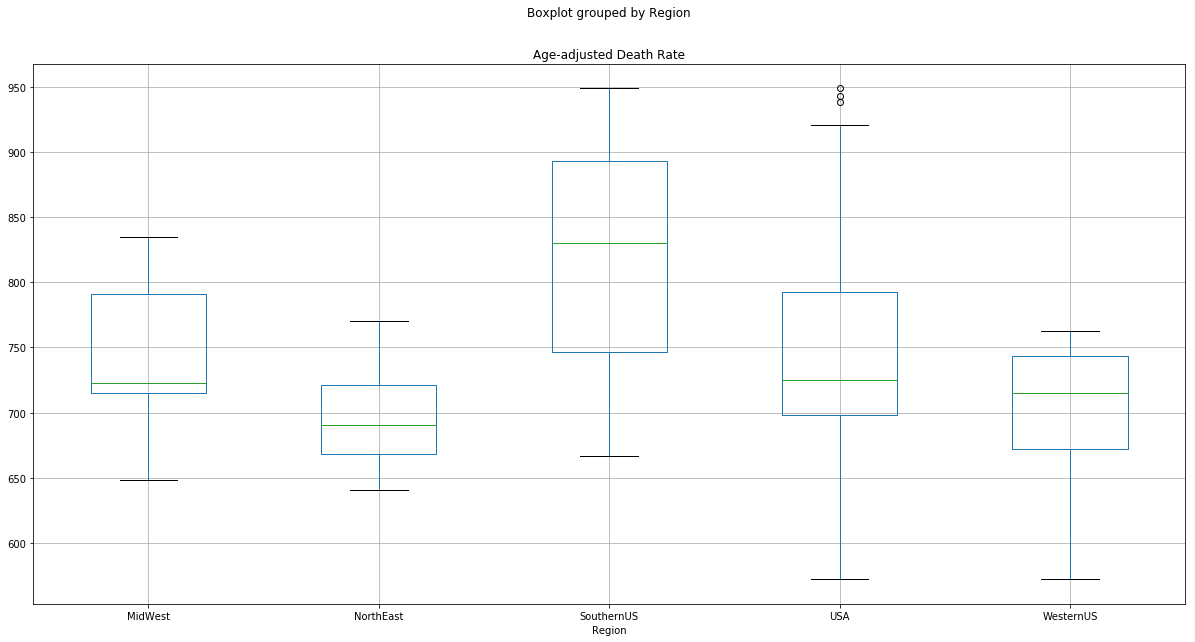

In [99]:
concatenatedRegions = pd.concat([only2016,Northeast, Midwest,South, West])
concatenatedRegions.head()
concatenatedRegions.boxplot(by='Region', column=['Age-adjusted Death Rate'],figsize=(20,10))
group1 = concatenatedRegions[concatenatedRegions["Region"] == 'MidWest']["Age-adjusted Death Rate"]
group2 = concatenatedRegions[concatenatedRegions["Region"] == 'NorthEast']["Age-adjusted Death Rate"]
group3 = concatenatedRegions[concatenatedRegions["Region"] == 'SouthernUS']["Age-adjusted Death Rate"]
group4 = concatenatedRegions[concatenatedRegions["Region"] == 'USA']["Age-adjusted Death Rate"]
group5 = concatenatedRegions[concatenatedRegions["Region"] == 'WesternUS']["Age-adjusted Death Rate"]

In [100]:
stats.f_oneway(group4, group4)

F_onewayResult(statistic=0.0, pvalue=1.0)

### (c) Create dataframe for 2016 Suicide Death Rates by Region

In [101]:
# read file for states all causes of death data
file3 = pd.read_csv('cleaned.csv')
only2016 = file3.loc[file3["Year"] == 2016, :]
onlySuicide = only2016.loc[only2016["Cause Name"] == "Suicide", :]   

# Group states by region (US Census Bureau divides US into 4 regions):
Northeast2 = onlySuicide.loc[onlySuicide["State"].isin(["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "New Jersey", "Pennsylvania"])]                            
Midwest2 = onlySuicide.loc[onlySuicide["State"].isin(["Ohio", "Michigan", "Indiana", "Wisconsin", "Illinois", "Minnesota", "Iowa", "Missouri", "North Dakota", "South Dakota", "Nebraska", "Kansas"])]
South2 = onlySuicide.loc[onlySuicide["State"].isin(["Delaware", "Maryland", "Virginia", "West Virginia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Georgia", "Florida", "Alabama", "Mississippi", "Arkansas", "Louisiana", "Texas", "Oklahoma", "District of Columbia"])]
West2 = onlySuicide.loc[onlySuicide["State"].isin(["Montana", "Idaho", "Wyoming", "Colorado", "New Mexico", "Arizona", "Utah", "Nevada", "California", "Oregon", "Washington", "Alaska", "Hawaii"])]

Midwest2.loc[:,'Region']='MidWest'
South2.loc[:,'Region']='SouthernUS'
Northeast2.loc[:,'Region']='NorthEast'
West2.loc[:,'Region']='WesternUS'
onlySuicide.loc[:,'Region'] ='USA'

# calculate average death rate for each region
NEMean2 = Northeast["Age-adjusted Death Rate"].mean()
MWMean2 = Midwest["Age-adjusted Death Rate"].mean()
SMean2 = (South["Age-adjusted Death Rate"].mean())
WMean2 = West["Age-adjusted Death Rate"].mean()
NatMean2 = only2016["Age-adjusted Death Rate"].mean()

# create dataframe for regions, sort averages in descending order, format averages
RegionDf = pd.DataFrame({"Region": ["Northeast", "Midwest", "South", "West", "USA"], "Suicide Average": [NEMean2, MWMean2, SMean2, WMean2, NatMean2]})
RegionDf2 = RegionDf.sort_values(["Suicide Average"], ascending=False)
RegionDf2["Suicide Average"] = RegionDf2["Suicide Average"].map("{:.0f}".format)

RegionDf2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Region,Suicide Average
2,South,826
1,Midwest,745
0,Northeast,698
3,West,698
4,USA,55


### (d) Create bar chart for 2016 Suicide Death Rates by Region

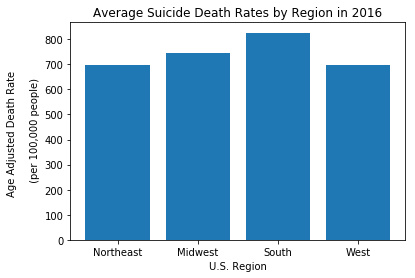

In [102]:
# define suicide means list
suicideAverage = [NEMean2, MWMean2, SMean2, WMean2]
# define regions list
Region = ["Northeast", "Midwest", "South", "West"]
# define height of bars
height = suicideAverage
# define names for bars
bars = Region
# create bars
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
# create x-axis names
plt.xticks(y_pos, bars)
#
plt.title("Average Suicide Death Rates by Region in 2016")
plt.xlabel("U.S. Region")
plt.ylabel("Age Adjusted Death Rate \n \n (per 100,000 people)")
# show chart
plt.show()

In [103]:
concatenatedRegions2 = pd.concat([onlySuicide, Northeast2, Midwest2, South2, West2])
concatenatedRegions2.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Region
7395,2016,Suicide,Alabama,788,15.7,USA
7413,2016,Suicide,Alaska,193,25.8,USA
7431,2016,Suicide,Arizona,1271,17.7,USA
7449,2016,Suicide,Arkansas,555,18.2,USA
7467,2016,Suicide,California,4294,10.5,USA


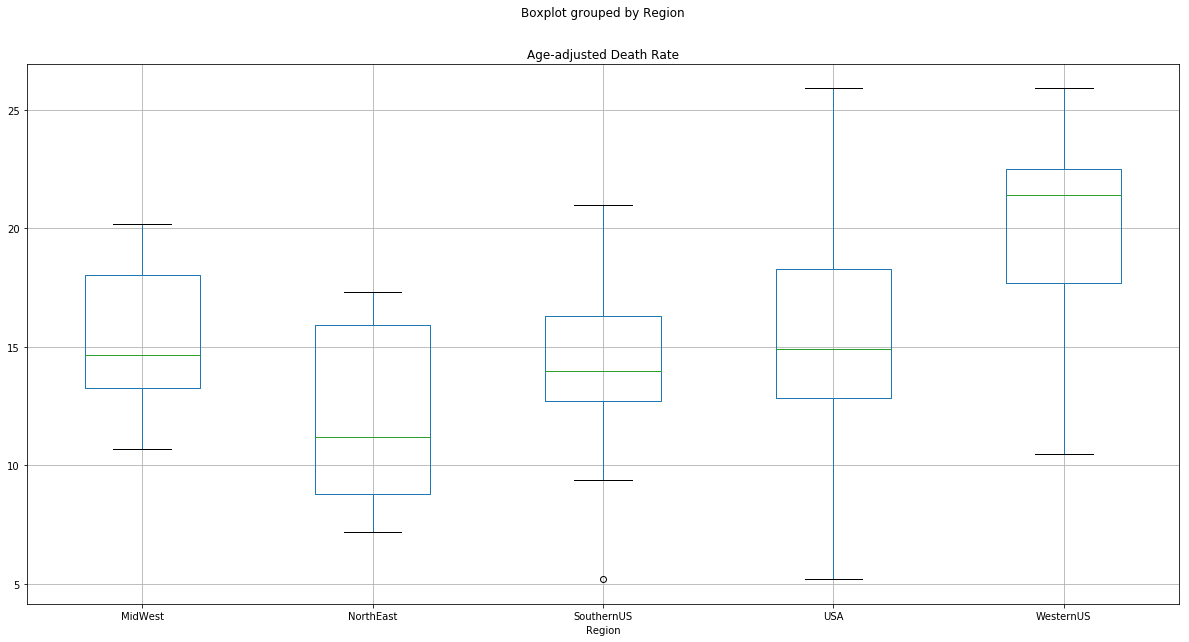

In [104]:
concatenatedRegions2.boxplot(by='Region', column=['Age-adjusted Death Rate'],figsize=(20,10))

group10 = concatenatedRegions2[concatenatedRegions2["Region"] == 'MidWest']["Age-adjusted Death Rate"]
group20 = concatenatedRegions2[concatenatedRegions2["Region"] == 'NorthEast']["Age-adjusted Death Rate"]
group30 = concatenatedRegions2[concatenatedRegions2["Region"] == 'SouthernUS']["Age-adjusted Death Rate"]
group40 = concatenatedRegions2[concatenatedRegions2["Region"] == 'USA']["Age-adjusted Death Rate"]
group50 = concatenatedRegions2[concatenatedRegions2["Region"] == 'WesternUS']["Age-adjusted Death Rate"]

In [105]:
stats.f_oneway(group40, group40)

F_onewayResult(statistic=-8.714031282369689e-31, pvalue=nan)